# Лабораторная работа 0

## Студент: Синдюков В.Р.


## Группа: М80-308Б

### Постановка задачи: 
Требуется сформировать/получить два набора данных соответствующие следующим критериям:
- Один из датасетов должен представлять собой корпус документов. Язык, источник и тематика произвольна
- Второй датасет должен содержать категориальные, количественные признаки. Для данного датасета определить предсказываемые признаки (для задачи регрессии и классфикации). Если такого признака нет, спроектировать

Данные датасеты будут в дальнейшем использованы в оставшихся лабораторных работах. По каждому датасету построить распределения признаков (в случае корпуса документов – построить распределение слов) и объяснить имеющуюся картину. Вычислить статистические характеристики признаков. Обнаружить и решить возможные проблемы с данными. Если решить данную проблему невозможно, объяснить почему.

### Использованные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

### Задание 1. Работа с датасетом с категориальными и количественными признаками

In [10]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [11]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Предсказываемые признаки:
- Продажи видео игр в различных странах в зависимости от года
- Оценки критиков, в зависимости от игровой платформы

Для задачи классификации:
- Рыночная доля игровых платформ, рассчитанная по количеству выпущенных игр и по суммарной выручке
- Рейтинг игровых издательств, расчитанная на основе оценок игр, выпущенных издательством

**Названия стольбцов и их типы**

In [12]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


**Количество данных для каждого параметра, медиана, стандартное отклонение, минимум, кватили (0.25, 0.5, 0.75), максимум**

In [14]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Средние показатели для издательста Nintendo**

In [15]:
data[data['Publisher'] == 'Nintendo'].mean()

Year_of_Release    2003.900000
NA_Sales              1.157181
EU_Sales              0.593499
JP_Sales              0.648938
Other_Sales           0.134108
Global_Sales          2.533725
Critic_Score         75.525806
Critic_Count         42.029032
User_Count          197.812925
dtype: float64

Значение, которое продажи в США не превысят с вероятностью 0.5(персентиль)

In [22]:
np.percentile(data['NA_Sales'], 50)

0.08

**График продаж игр, в зависимости от года**

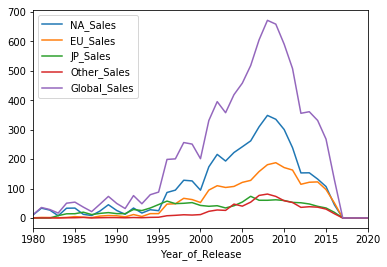

In [17]:
sales_data = data[[x for x in data.columns if 'Sales' in x] + ['Year_of_Release']]
sales_data.groupby('Year_of_Release').sum().plot()

**Оценки критиков, в зависимости от издателя**

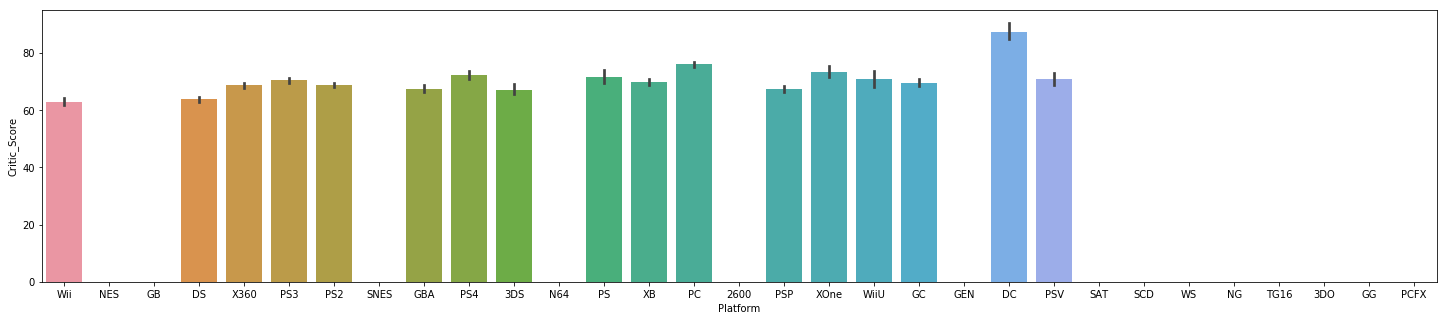

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5
sns.barplot(data = data, x = 'Platform', y = 'Critic_Score')

По распределению оценок видно, на какую платформу выходили или выходять в среднем наиболее рейтинговые игры.

In [34]:
import nltk
import os
from collections import Counter
directory = 'C:\\Users\\Влад\\PycharmProjects\\ml0\\Food\\'
files = os.listdir(directory)

text = ''
for file in files:
    review = open(directory+file, 'r')
    for line in review:
        text += line

tokens = nltk.word_tokenize(text)
c = Counter(tokens)
most = dict(c.most_common(30))
for i in ',.!':
    most.pop(i)
most

{'I': 29406,
 'the': 28773,
 'and': 21964,
 'a': 21395,
 'to': 17785,
 'it': 15334,
 'of': 14420,
 'is': 13368,
 '>': 13129,
 '<': 13104,
 '/': 12468,
 'br': 12434,
 'for': 9309,
 'this': 9054,
 'in': 9052,
 'that': 7855,
 'my': 6786,
 'you': 6418,
 'have': 6214,
 'but': 6124,
 'are': 6080,
 'with': 6019,
 'not': 5690,
 "n't": 5435,
 'was': 5430,
 "'s": 5271,
 'like': 4979}

**Построение гистограммы распределения наиболее часто встречающихся слов**

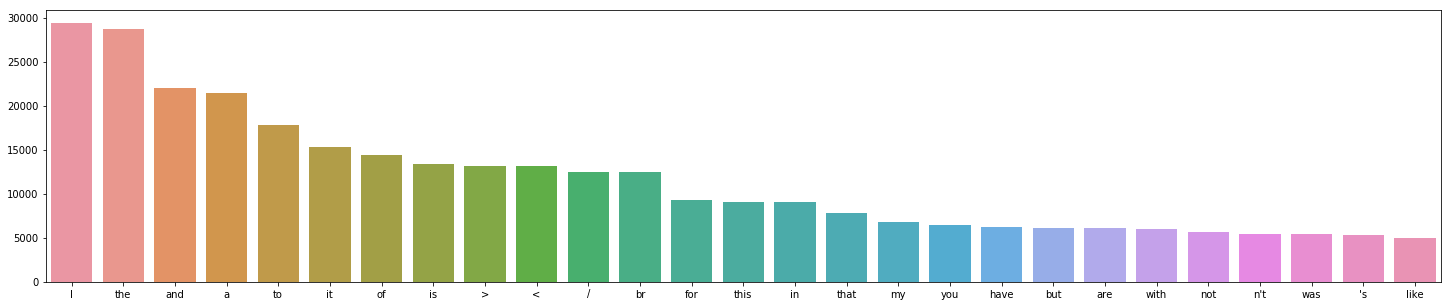

In [35]:
data = {'x':[], 'y':[]}
for label, coord in most.items():
    data['x'].append(label)
    data['y'].append(coord)
sns.barplot(x = data['x'], y = data['y'])

Удалив из списка знаки препинания, проблема, с которой я столкнулся - наиболее часто встречающимися словами в большинстве случаев оказались артикли и местоимения, что не позволяет определить тип еды, о которой говорят чаще всего пользователи, и хотя бы приблизительно понять ее оценку. Поэтому нужно провести более глубокий анализ, исключив по возможности как можно артиклей и оставив примущественно названия блюд или отдельных продуктов, а также прилагательные и описания, которые к ним относятся. 